<h1 align="center">Machine Learning for Bioinformatics</h1>
<h3 align="center">Freie Universität Berlin - SoS 2024</h3>
<h5 align="center">Exercise Notebook 10 - Model Selection</h5>
<hr style="border:2px solid gray">

### Import python packages
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import default_rng
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.linear_model import lars_path, Ridge

---
### Data set
---

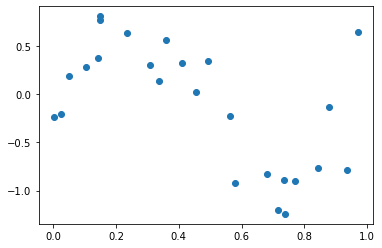

In [3]:
data = np.array([
    0.001399613, -0.23436656,
    0.971629779,  0.64689524,
    0.579119475, -0.92635765,
    0.335693937,  0.13000706,
    0.736736086, -0.89294863,
    0.492572335,  0.33854780,
    0.737133774, -1.24171910,
    0.563693769, -0.22523318,
    0.877603280, -0.12962722,
    0.141426545,  0.37632006,
    0.307203910,  0.30299077,
    0.024509308, -0.21162739,
    0.843665029, -0.76468719,
    0.771206067, -0.90455412,
    0.149670258,  0.77097952,
    0.359605608,  0.56466366,
    0.049612895,  0.18897607,
    0.409898906,  0.32531750,
    0.935457898, -0.78703491,
    0.149476207,  0.80585375,
    0.234315216,  0.62944986,
    0.455297119,  0.02353327,
    0.102696671,  0.27621694,
    0.715372314, -1.20379729,
    0.681745393, -0.83059624 ]).reshape(25,2)
y = data[:,1]
X = data[:,0:1]

plt.scatter(X[:,0], y)
plt.show()

In [4]:
def compute_polynomial_features(X, degree, with_intercept=True):
    # degree = p+1
    x = X if len(X.shape) == 1 else X[:,0]
    F = np.array([]).reshape(x.shape[0], 0)
    for deg in range(degree+1):
        F = np.insert(F, deg, x**deg, axis=1)
    if with_intercept:
        return F
    else:
        return F[:,1:]

---
# Assignment 1: PRESS for linear ridge regression
---

The *MyRidgeRegressor* class implements ridge regression for an arbitrary set of features $F$ from which is uses only the first $p$ features. This allows us to compute $F$ in advance and then perform ridge regression for varying $p$. In addition *MyRidgeRegressor* implements a method to compute the PRESS statistic.

In [87]:
class MyRidgeRegressor:
    def __init__(self, p=3, alpha=0.0):
        self.p     = p
        self.theta = None
        self.alpha = alpha
    
    def fit(self, F, y):
        F = F[:, 0:self.p]
        # Complete the implementation. Please use pinv to compute inverse matrices

    def press(self, F, y):
        F = F[:, 0:self.p]
        # Complete the implementation. Please use pinv to compute inverse matrices

    def predict(self, F):
        F = F[:, 0:self.p]
        return F@self.theta

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def get_params(self, deep=True):
        return {"p" : self.p, "alpha" : self.alpha}

---
# 1.1 Performance evaluation
---

We evaluate *MyRidgeRegressor* on the following set of features:

In [108]:
F = compute_polynomial_features(X, 9)

Please compute and plot the PRESS statistic on $F$ for $p = 1, \dots, 10$:

Use the PRESS statistic to compute LOO-CV with mean squared error for $p = 1, \dots, 10$:

---
# Assignment 2: Degrees of freedom
---

The function *df* computes the degrees of freedom for linear ridge regression with penalty strength $\alpha$:

In [79]:
def df(F, alpha):
    # Complete the implementation of this function

---
# 2.1 DF as a function of $\alpha$
---

We evaluate the degrees of freedom for varying $\alpha$ on the following data:

In [112]:
F = compute_polynomial_features(X, 25)

Plot the degrees of freedom for $\alpha \in [0, 1]$:

---
# 2.2 DF as a function of p
---

We fix $\alpha = 0$ and evaluate the degrees of freedom for $p = 1, \dots, 50$:

---
# Assignment 3: Regularization paths
---

In this short assignment we compute the regularization paths for $\ell_1$ and $\ell_2$ penalties. We use regressors from the *scikit-learn* library, which do not require an explicit representation of the intercept in the feature matrix $F$. Therefore, we use the following feature matrix:

In [127]:
F = compute_polynomial_features(X, 10, with_intercept=False)

---
# 3.1 L1-Regularization (LASSO)
---

Use *lars_path* with *method='lasso'* to compute the $\ell_1$ regularization path. Plot the coefficients as a function of $\alpha$ with a log-scale for the x-axis and a symlog scale for the y-axis. Also, invert the x-axis so that stronger regularization strengths are on the left.

---
# 3.2 L2-Regularization
---

Unfortunately, *scikit-learn* does not provide a similar method to compute $\ell_2$ regularization paths. Please consider the following set of $\alpha$ values:

In [ ]:
n_alphas = 100
alphas = np.logspace(-8, -1, n_alphas)

Implement a method to compute the $\ell_2$ regularization path and plot it in the same way as for the $\ell_1$ path.

---
# Assignment 4: Implicit regularization
---

## 4.1 Noisy polynomial features
---

Increasing the number of features not always leads to an increase in model complexity. There are several cases where adding more features actually constraints the model, which we call here *implicit regularization*. For instance, adding features to $F$ that are uncorrelated with $y$ will generally lead to a stronger regularization (e.g. when adding columns to $F$ that are drawn from a normal distribution). Here, we test a different strategy to increase implicit regularization. We implement a function called *compute_noisy_polynomial_features* that computes noisy polynomial features $F$ from $X = (x)$. The $j$-th column of $F \in \mathbb{R}^{n \times p}$ is given by
$$
    f_j
    =
    \begin{cases}
        (1, \dots, 1)^\top & \text{if $j = 1$}\\
        x^{k(j-2)} + \epsilon_j & \text{if $j > 1$}
    \end{cases}
$$
where $k(j) = (j\mod m) + 1$, $m \le p$ denotes the maximum degree (*max_degree* parameter) and $\epsilon_j$ is a vector of $n$ independent draws from a normal distribution with mean $\mu = 0$ and standard deviation $\sigma$. With $x^k$ we denote the $k$-th power of each element in $x$.

In [190]:
def compute_noisy_polynomial_features(X, p, max_degree, scale=0.1, random_state=42):
    x = X if len(X.shape) == 1 else X[:,0]
    # Please use rng to generate normal samples
    rng = default_rng(seed=random_state)
    # Please complete the implementation of this function

---
## 4.2 Double-descent curves for LOO-CV
---

We apply in the following the *MyRidgeRegressor* to the random polynomial features and evaluate its performance for $\alpha = 0$, $p = 3, 4, \dots, 200$, and $\sigma \in \{0.01, 0.02, 0.05\}$. We use LOO-CV with average mse as score and since $F$ is random we must average over several draws. Keep in mind that you need to vary the *random_state* argument.

In [176]:
def evaluate_model(X, y, ps, max_degree=15, scale=0.1, runs=10):
    # ps: A vector of p values
    # max_degree: The maximum degree of our features (m)
    # scale: The standard deviation for generating noisy features
    # runs: Number of times the LOO-CV is repeated
    #
    # Complete the implementation of LOO-CV. If i denotes the i-th repetition of LOO-CV, use i as the
    # random state (0-based) for generating the noisy polynomial features.

In [397]:
ps = range(3, 201)
scales = [0.01, 0.02, 0.05]
result = [ evaluate_model(X, y, ps, scale=scale, runs=100) for scale in scales ]
result = np.array(result)

Plot the results of LOO-CV, i.e. the average mse as a function of $p$, and use a log-scale for the x- and y-axis. You should obtain three curves for each value of $\sigma$.